In [2]:
!pip install cmake
!pip install face_recognition

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def from_camera():
    cap = cv2.VideoCapture(0)
    ret, frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    cap.release()
    plt.imshow(frame)
    plt.show()
    return frame

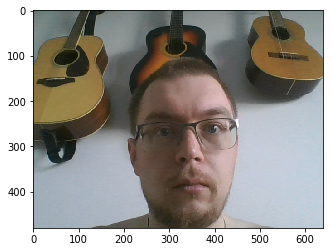

In [20]:
import face_recognition
import pickle

# Take a foto of yourself with a camera. Or load from file

image = from_camera()  # face_recognition.load_image_file('your_photo.jpg')

In [24]:
face_locations = face_recognition.face_locations(image)
print("Detect with HoG:", face_locations)
face_locations2 = face_recognition.face_locations(image, model='cnn')
print("Detect with CNN:", face_locations2)

embeddings = face_recognition.face_encodings(image, known_face_locations=face_locations2)
print("Embedding size:", embeddings[0].shape)

Detect with HoG: [(201, 468, 468, 200)]
Detect with CNN: [(159, 465, 404, 221)]
Embedding size: (128,)


In [35]:
import base64

s = base64.b64encode(embeddings[0].tostring())
print(s)

# TODO: sumbit the string you get here to common chat

b'AAAAAILop78AAAAAoKo7vwAAACBpC8A/AAAAAHSmir8AAADg0XOyvwAAAABZ24q/AAAAgL2rob8AAABg/me2vwAAAIAXE7I/AAAA4FqLpb8AAABgNEbTPwAAAGCKi8K/AAAAgH9jzr8AAAAAL6+bvwAAAAC43ky/AAAAoLy0tD8AAAAg17nBvwAAAIBFnJq/AAAAYFA9t78AAAAAtkKpvwAAAADx6qQ/AAAAICflnD8AAACg5+OpPwAAAICTZaU/AAAAAGeYtb8AAADgXVDVvwAAAIAZxMC/AAAAwOzZw78AAABg5gGnPwAAAMBpALS/AAAA4Fy6ob8AAABAd+SsPwAAAIClRru/AAAAAPIHr78AAAAAGHlAPwAAAEDGWrE/AAAAgFZBsr8AAACAACHBvwAAAGC2YM4/AAAAgFenrL8AAAAAs5jDvwAAAAAPqoO/AAAAgLM7sD8AAAAghq/MPwAAAKBcG8Y/AAAAwK2FsT8AAAAAtAJzPwAAAIBBU4+/AAAAwC1LuD8AAAAgo4PPvwAAAIBmFb4/AAAA4PuTwz8AAABA9SjEPwAAAIADR7I/AAAAQAtFuT8AAADAPpG7vwAAAACEDqs/AAAAoIimtj8AAAAAu9fIvwAAAABGz7Q/AAAAoM9msz8AAADghtS3vwAAAID9DZk/AAAAwCnKsL8AAAAAGXfJPwAAAADhY8A/AAAAYB86ub8AAADAEZe2vwAAAAAnsbw/AAAAQKD6wb8AAACAqje+vwAAAGBU5LE/AAAAAImHyL8AAABAr7DJvwAAAMDLDtO/AAAAoMJ5qT8AAADAgXPbPwAAAMBih78/AAAAQI1ky78AAABANTqfPwAAAADuZow/AAAAIPCItb8AAACArQi9PwAAAKCwt8E/AAAAAIHCm78AAADgwc59vwAAACAFJ7q/AAAAQIjipD8AAACApTLGPwAAAKB3NLe/AAAAQH7Bsr8AAABAdLzKPwAAAICZxKC/AAAAQN

In [38]:
face_strings = [
    s,
    # TODO add face strings of your classmates here
]

names = [
    "Myself",
    # TODO add names of your classmates
]

face_embeddings = [
    np.frombuffer(base64.b64decode(s), dtype=float) for s in face_strings
]

# check
face_recognition.compare_faces(face_embeddings, face_embeddings[0], tolerance = 0.5)

[True]

## TODO
1. Switch on your camera in zoom.
2. When everyone is online, take a screenshot.
3. Load an image with `face_recognition.load_image_file`.
4. Detect all faces on the image using `face_recognition.compare_faces`.
5. Draw bounding boxes and write names on a screenshot.
6. Submit result to chat.